# Confidence interval (1)

This notebook covers the following cases:

1. known $\sigma$, data with normal distribution, any sample size
2. known $\sigma$, data with unknown distribution, large sample ($n \ge 30$)

## Imports and data

Required imports

In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

Configure values for the problem space

In [2]:
mu = 450
sigma = 10
n = 100
LoCpc = 95

Calculate other required values

In [3]:
stdErr = sigma / math.sqrt(n)

Prepare a random sample to work with (with the given parameters)

In [4]:
sample = np.random.normal(loc=mu, scale=sigma, size=n)
sample

array([443.72748528, 443.03130861, 453.92361736, 449.25777053,
       438.25906107, 453.90266665, 438.81729392, 448.15305584,
       437.46089199, 449.60834991, 456.08827666, 453.13280578,
       461.98945534, 464.23913251, 423.89328586, 463.83418335,
       450.21894675, 451.40734802, 447.81565342, 470.55350959,
       458.31859837, 454.33584915, 450.83515435, 439.78517469,
       458.53409713, 456.03547702, 444.35699946, 454.53166068,
       445.1152836 , 422.03151194, 459.26272502, 460.49214337,
       438.49014654, 462.09571682, 449.07551012, 448.40030618,
       460.96242705, 456.30918784, 442.20276015, 442.52285571,
       447.21623428, 448.62810401, 442.31565839, 459.09840601,
       446.20985162, 454.50635136, 452.56666327, 459.75032132,
       435.09861798, 453.09096087, 427.23156091, 453.42906077,
       442.6969578 , 455.73939484, 454.87506253, 440.5013097 ,
       450.76389988, 452.38277092, 428.7883178 , 450.72511737,
       442.35947112, 440.24226337, 457.02799359, 434.71

## Preparation

We calculate the sample mean, $\bar{x}$.

In [5]:
xmean = stats.mstats.tmean(sample)
xmean

449.2935896825467

## Confidence interval

Now we can go through the same steps as we do manually to determine the confidence interval.


Find the cut-off points in the z-distribution. The first argument to `interval()` is the confidence as a fraction of 1.

In [6]:
zAlphaHalvedNeg, zAlphaHalvedPos = stats.norm.interval(LoCpc / 100)
print(zAlphaHalvedNeg, zAlphaHalvedPos)

-1.959963984540054 1.959963984540054


De-standardise the upper cut-off point.

In [7]:
halfIntervalWidth = zAlphaHalvedPos * stdErr
halfIntervalWidth

1.959963984540054

Print the confidence interval.

In [8]:
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}'.format(xmean, halfIntervalWidth))

Confidence interval: 449.294 ± 1.960


**Rather than employing the step-by-step approach as in manual calculations, the interval can be obtained by getting the lower and upper cut-off values in one step:**

In [9]:
COl, COu = stats.norm.interval(LoCpc / 100, xmean, stdErr)
print('Cut-off values: {0:.3f}, {1:.3f}'.format(COl, COu))
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}, with {2}% confidence'.format(xmean, COu - xmean, LoCpc))

Cut-off values: 447.334, 451.254
Confidence interval: 449.294 ± 1.960, with 95% confidence


## Plot

Prepare the data

In [10]:
halfFigWidthInStdErr = 3
pointsPerStdErr = 20
plotXMin = xmean - halfFigWidthInStdErr * stdErr
plotXMax = xmean + halfFigWidthInStdErr * stdErr
plotYMin = 0
plotYMax = stats.norm.pdf(xmean, xmean, stdErr) * 1.2

x = np.linspace(plotXMin, plotXMax, pointsPerStdErr * halfFigWidthInStdErr * 2)

Plot

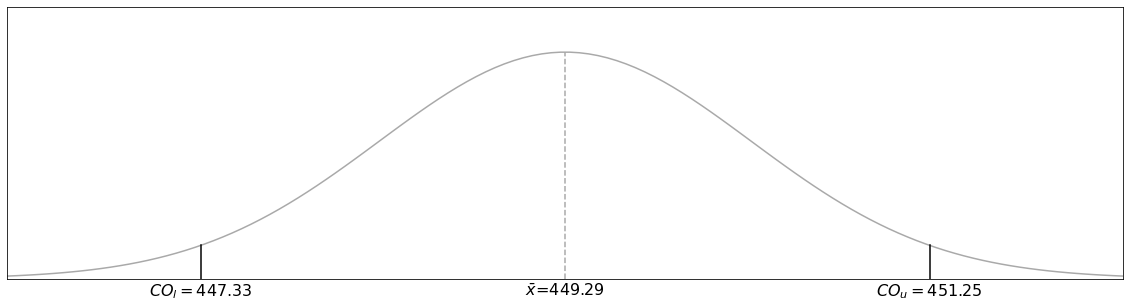

In [11]:
plt.figure(figsize=(20,5)) 
plt.xlim([plotXMin, plotXMax])
plt.tick_params(length=0)
plt.ylim([0, plotYMax])

# x-ticks with text only
plt.xticks([xmean - halfIntervalWidth, xmean, xmean + halfIntervalWidth], 
           [r'$CO_l={0:.2f}$'.format(xmean - halfIntervalWidth), 
            r'$\bar x$={0:.2f}'.format(xmean), 
            r'$CO_u={0:.2f}$'.format(xmean + halfIntervalWidth)], fontsize=16)

# no y-ticks
plt.yticks([])

# function
plt.plot(x, stats.norm.pdf(x, xmean, stdErr), color='darkgray')

# vertical lines
plt.plot([xmean - halfIntervalWidth, xmean - halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean + halfIntervalWidth, xmean + halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean, xmean], [0, stats.norm.pdf(xmean, xmean, stdErr)], color='darkgray', linestyle='--')
plt.show()